# Exploratory Analysis of Neuralink Compression Data

In [2]:
# Imported Libraries

from glob import glob
import IPython.display as ipd
import librosa 
import matplotlib.pyplot as plt
import numpy as np


In [3]:
SAMPLE_RATE = 20000

In [4]:
data_dir = '../data'
data_file_list = glob(data_dir + '/*.wav')

In [5]:
data_file_list[:5] # Listing the first 5 elements

['../data/102b47d9-371e-412a-8995-0dc6115ab2bb.wav',
 '../data/2eef5d4d-93d1-4c0e-9d23-0989abaa34d0.wav',
 '../data/fa2c5efb-cc0d-4292-ab99-91d345cf17d9.wav',
 '../data/0458e9fc-6403-427e-afec-6a659104399a.wav',
 '../data/30dee5fe-ded7-4978-9480-e40155e7b060.wav']

In [6]:
# Playing an audio sample
ipd.Audio(data_file_list[0])


In [7]:
# Loading the first sample
# Loading the data takes longer than 7 seconds. 
# This needs to be reduced.

data, sample_rate = librosa.load(data_file_list[0], sr = SAMPLE_RATE)
print(f'Sample Rate: {sample_rate}')


Sample Rate: 20000


In [8]:
data

array([-0.00958753, -0.01346616, -0.00809547, ...,  0.00739533,
       -0.00881782,  0.        ], dtype=float32)

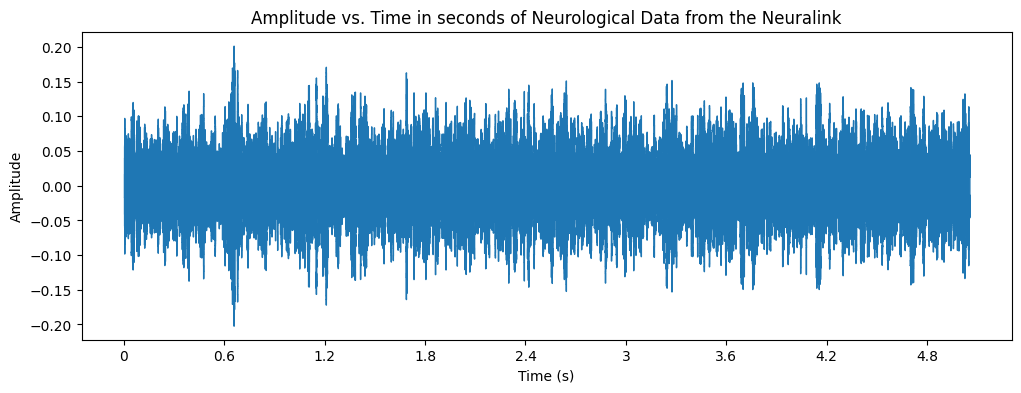

In [9]:
# Defining a figure that is 12 inches by 4 inches
plt.figure(figsize=(12, 4)) 
librosa.display.waveshow(data, sr=SAMPLE_RATE)
title = 'Amplitude vs. Time in seconds of Neurological Data from the Neuralink'
plt.title(title)
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.show()


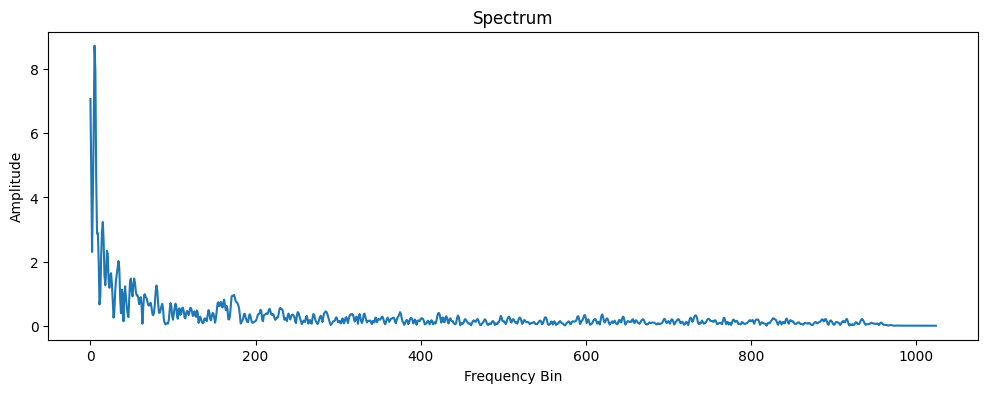

In [10]:
# Examining the frequency bins of the data
import numpy as np
import librosa
import matplotlib.pyplot as plt

n_fft = 2048
plt.figure(figsize=(12, 4))
ft = np.abs(librosa.stft(data[:n_fft], hop_length= n_fft +1))
plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.show()


In [13]:
ft.shape

(1025, 1)

In [23]:
# Attempting to eliminate frequencies that are above 200 Hz
print(f'ft.shape: {ft.shape}\n')
print(f'ft[0:200]: {ft[0:200]}')

ft.shape: (1025, 1)

ft[0:200]: [[7.0635943 ]
 [4.635404  ]
 [2.301128  ]
 [4.1312346 ]
 [6.240462  ]
 [8.724682  ]
 [7.935223  ]
 [4.55724   ]
 [2.873775  ]
 [2.8848863 ]
 [2.050514  ]
 [0.6655703 ]
 [0.9312595 ]
 [2.1797645 ]
 [2.938455  ]
 [3.2343228 ]
 [2.6327374 ]
 [1.5634141 ]
 [1.2659484 ]
 [1.6762598 ]
 [2.3417327 ]
 [2.239907  ]
 [1.3981469 ]
 [1.1849253 ]
 [1.5553386 ]
 [1.6398903 ]
 [1.3183495 ]
 [0.7682591 ]
 [0.2530358 ]
 [0.46615538]
 [1.0708885 ]
 [1.4323417 ]
 [1.6217245 ]
 [1.8147149 ]
 [2.0163174 ]
 [1.7791104 ]
 [0.85322833]
 [0.38998756]
 [1.1258626 ]
 [0.9407731 ]
 [0.13969228]
 [0.9617103 ]
 [1.2298489 ]
 [0.89433134]
 [0.56658053]
 [0.38074088]
 [0.27127954]
 [0.86759996]
 [1.3958007 ]
 [1.4709913 ]
 [1.0849366 ]
 [0.91686636]
 [1.2912678 ]
 [1.4738498 ]
 [1.3274637 ]
 [1.0706958 ]
 [0.94803476]
 [0.953744  ]
 [0.8671962 ]
 [0.67410606]
 [0.77600753]
 [0.89341164]
 [0.60902226]
 [0.06659681]
 [0.592808  ]
 [0.960483  ]
 [0.9850403 ]
 [0.8930461 ]
 [0.8618347 ]
 [

In [12]:
freq_threshold = 200
ft_idx = np.arange(len(ft)) 
ft_idx = ft_idx < freq_threshold


In [13]:
ft_idx.shape

(1025,)

In [14]:
ft.shape

(1025, 1)

In [15]:
ft_denoised = ft[:,0] * ft_idx

In [16]:
ft_denoised = ft_denoised.reshape(1025, 1)

In [17]:
ft_denoised.shape

(1025, 1)

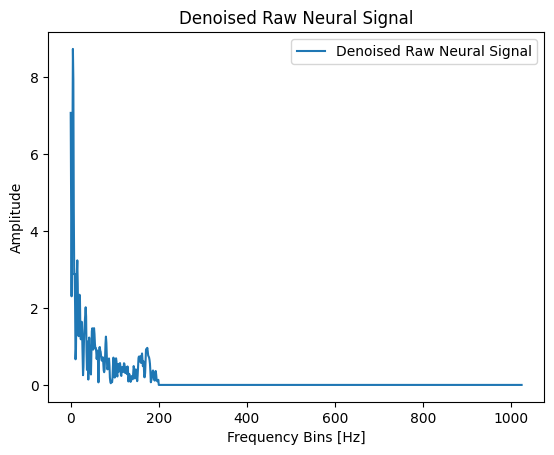

In [18]:
plt.plot(ft_denoised)
plt.title('Denoised Raw Neural Signal')
plt.xlabel('Frequency Bins [Hz]')
plt.ylabel('Amplitude')
plt.legend(['Denoised Raw Neural Signal'])
plt.show()

In [26]:
# Examining the Energy Density of the Raw Signal
n = len(data)
fhat = np.fft.fft(data, n)
psd = fhat * np.conj(fhat) / n
dt = 1/sample_rate
freq = (1/(dt*n)) * np.arange(n)


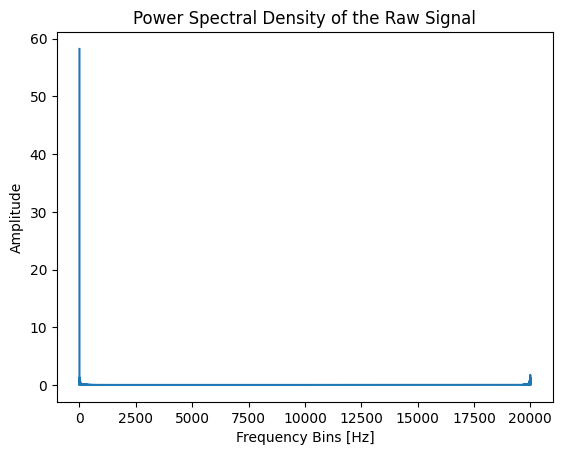

In [27]:
plt.plot(freq, psd)
plt.title('Power Spectral Density of the Raw Signal')
plt.ylabel('Amplitude')
plt.xlabel('Frequency Bins [Hz]')
plt.show()


In [28]:
# Removing High Frequency, Low Amplitude Signal

threshold = 10
psd_idxs = psd > threshold
psd_clean = psd * psd_idxs
fhat_denoised = psd_idxs * fhat
signal_filtered = np.fft.ifft(fhat_denoised)


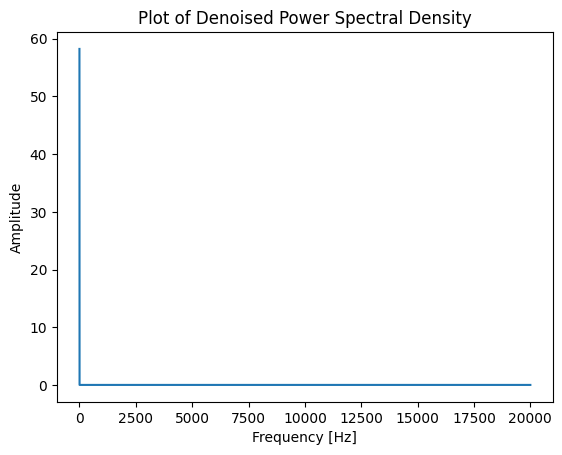

In [12]:
# Plotting the PSD of the Denoised signal
plt.plot(freq, psd_clean)
plt.title('Plot of Denoised Power Spectral Density')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()


In [13]:
len(signal_filtered)

101070

In [15]:
time = np.arange(start=0, stop=(len(signal_filtered) / sample_rate), 
                  step=(1/sample_rate))
time.shape
time

array([0.00000e+00, 5.00000e-05, 1.00000e-04, ..., 5.05335e+00,
       5.05340e+00, 5.05345e+00])

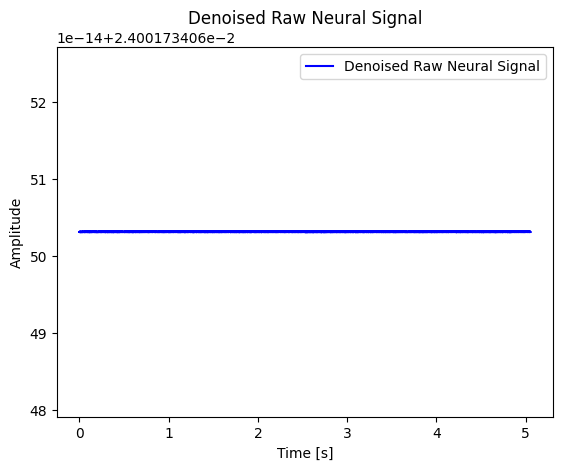

In [16]:
plt.plot(time, signal_filtered, 'b')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Denoised Raw Neural Signal')
plt.legend(['Denoised Raw Neural Signal'])
plt.show()

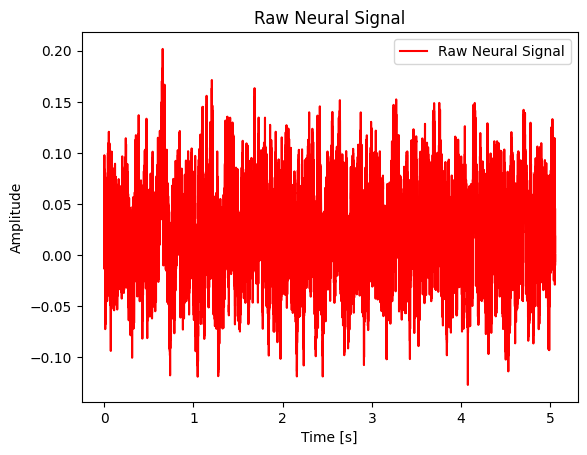

In [17]:
plt.plot(time, data, 'r')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Raw Neural Signal')
plt.legend(['Raw Neural Signal'])
plt.show()

In [ ]:
# Filtering below the threshold




## Filtering the signal to remove noise

In [ ]:
def plot_neural_audio(data, sample_rate):
    """This function plots raw neural signal given data and a sample rate.

    Args:
        data (): _description_
        sample_rate (_type_): _description_
    """
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(data, sr=sample_rate)
    title = 'Amplitude vs Time in Seconds of Neural Data Audio'
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()


## Exploring Sample #45


In [ ]:
# There is an unusual audible sound in sample 44.
# I am exploring the data.

ipd.Audio(data_file_list[44])


In [ ]:
data, sample_rate = librosa.load(data_file_list[44], sr = SAMPLE_RATE)
plot_neural_audio(data, sample_rate)


## Exploratory Analysis of Sample #3 of the Neural Audio Data

In [ ]:
ipd.Audio(data_file_list[2])

In [ ]:
# Loading the data and plotting the waveform

data, sample_rate = librosa.load(data_file_list[2], sr = SAMPLE_RATE)
plot_neural_audio(data, sample_rate)


In [ ]:
# Creating a spectrogram of the raw neural data
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

data, sample_rate = librosa.load(data_file_list[2], sr = SAMPLE_RATE)
f, t, Sxx = signal.spectrogram(data, SAMPLE_RATE)


In [ ]:
plt.pcolormesh(t, f, Sxx, shading='goraud')
plt.title('Plot of Raw Neural Signal')
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()


In [ ]:
data, sample_rate = librosa.load(data_file_list[44], sr = SAMPLE_RATE)
f, t, Sxx = signal.spectrogram(data, SAMPLE_RATE)


In [ ]:
def plot_spectrogram(data, sample_rate):
    """This plots the spectrogram of the raw neural signal

    Args:
        data (np.ndarray): This is the array of data of the raw neural signal.
        sample_rate (int): This is the data's sample rate.
    """

    f, t, Sxx = signal.spectrogram(data, sample_rate)
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.title('Spectrogram')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()


In [ ]:
for index in range(0, 10):
    data, sample_rate = librosa.load(data_file_list[index], sr = SAMPLE_RATE)
    plot_spectrogram(data, sample_rate=sample_rate)


In [ ]:
data, sr = librosa.load(data_file_list[0], sr = SAMPLE_RATE)
f, t, Sxx = signal.spectrogram(data, sample_rate)


In [ ]:
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.title('Spectrogram')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## Creating a Spectrogram Using the Examples from the Scipy Documentation

In [ ]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [ ]:
# Generating a test signal: a 2 Vrms sine wave with a frequency of 3kHz
# This signal is corrupted by white noise which decays exponentially 
# and is sampled at 10kHz

fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise


In [ ]:
# Plot of the Sinewave with a decaying noise signal

f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.title('Sinewave with 10kHz Decaying Noise')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


In [ ]:
# Visualizing a test signal without noise

x_noiseless = x - noise
f, t, Sxx = signal.spectrogram(x_noiseless, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.title('Noiseless Sinewave')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
